In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
import random

Segmentation Models: using `keras` framework.


In [2]:
train_img_dir = "data/keras_data/train_images/train/"
train_mask_dir = "data/keras_data/train_masks/train/"

In [3]:
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

In [4]:
num_images = len(os.listdir(train_img_dir))

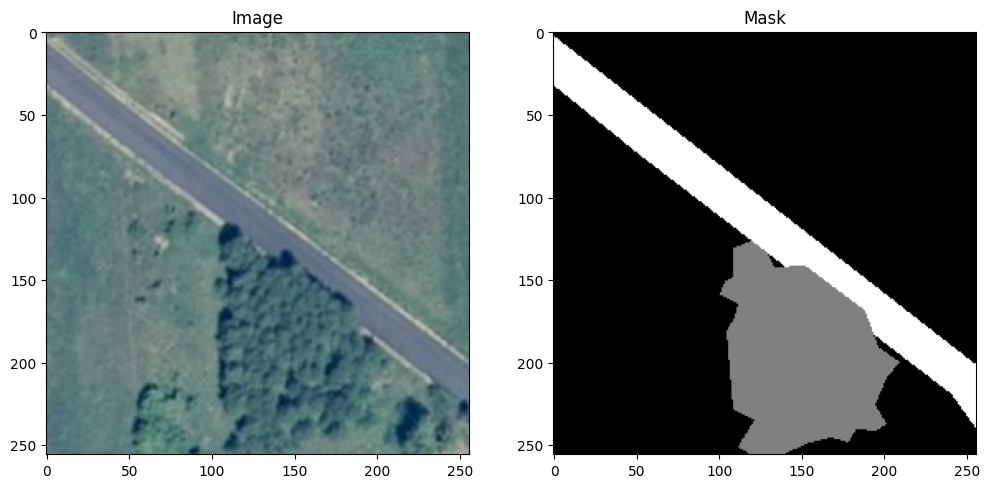

In [35]:
img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num], 0)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [37]:
# Define Generator for images and masks so we can read them directly from the drive. 

seed=24
batch_size= 4
n_classes=4

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

In [39]:
#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [40]:
#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc. 
def preprocess_data(img, mask, num_class):
    #Scale images
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img)  #Preprocess based on the pretrained backbone...
    #Convert mask to one-hot
    mask = to_categorical(mask, num_class)
      
    return (img,mask)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [42]:
train_img_path = "data/keras_data/train_images/"
train_mask_path = "data/keras_data/train_masks/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=4)

In [43]:
val_img_path = "data/keras_data/val_images/"
val_mask_path = "data/keras_data/val_masks/"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=4)

In [58]:
#Make sure the generator is working and that images and masks are indeed lined up. 
#Verify generator.... In python 3 next() is renamed as __next__()
x, y = train_img_gen

ValueError: not enough values to unpack (expected 2, got 0)

In [47]:
for i in range(0,3):
    image = x[i]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

NameError: name 'x' is not defined

In [55]:
x_val, y_val = val_img_gen

ValueError: not enough values to unpack (expected 2, got 0)

In [53]:
num_train_imgs = len(os.listdir('data/keras_data/train_images/train/'))
num_val_images = len(os.listdir('data/keras_data/val_images/val/'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

In [57]:
IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]

NameError: name 'x' is not defined